<a href="https://colab.research.google.com/github/maverick98/CDS/blob/main/Group38_PS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   CHARU MATHUR     :        2023AA05055
2.   SREERAMA GUNAVARDHAN :     2023AA05060
3.   SATYAJIT CHATTERJEE  :    2023AA05625
4.   MANO RANJAN SAHU     :    2023AA05738



### Generate synthetic data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + np.random.randn(1000, 1)

# Add x0 = 1 to each instance
m = len(X)
X_b = np.c_[np.ones((m, 1)), X]

##Define the learning rate scheduling functions.

In [2]:

def exponential_decay(initial_lr, global_step):
    decay_rate = 0.5
    return initial_lr * np.exp(-decay_rate * global_step)

def step_decay(initial_lr, global_step):
    step_size = 5
    decay_factor=0.5
    return initial_lr * (decay_factor ** (global_step // step_size))
def time_based_decay(initial_lr,global_step):
    decay = 1e-3
    lr = initial_lr / (1 + decay * global_step)
    return lr

### Plotting the results

In [7]:
def plot_learning_rate_decay(plt,lr_history,label,title,position_tuple):
    plt.subplot(position_tuple[0],position_tuple[1],position_tuple[2])
    plt.plot(lr_history, label=label)
    plt.xlabel('Iterations')
    plt.ylabel('Learning Rate')
    plt.title(title)
    plt.legend()
def plot_cost_lr_cost_history_against_fixed_lr(plt,lr_cost_history,cost_history_fixed,label,title,position_tuple):
    plt.subplot(position_tuple[0],position_tuple[1],position_tuple[2])
    plt.plot(lr_cost_history, label=label)
    plt.plot(cost_history_fixed, label='Fixed Learning Rate')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title(title)
    plt.legend()
def plot_learning_curves(initial_lr):
    plt.figure(figsize=(12, 10))
    position_tuple = (3, 3, 1)
    label_exp_decay='With Exponential Decay '+str(initial_lr)
    plot_learning_rate_decay(plt,lr_history_exp,label_exp_decay,'Exponential Decay of Learning Rate '+str(initial_lr),position_tuple)
    position_tuple = (3, 3, 2)
    label_step_decay='With Step Decay '+str(initial_lr)
    plot_learning_rate_decay(plt,lr_history_step,label_step_decay,'Step Decay of Learning Rate '+str(initial_lr),position_tuple)

    position_tuple = (3, 3, 3)
    label_time_decay='With Time based Decay '+str(initial_lr)
    plot_learning_rate_decay(plt,lr_history_time,label_time_decay,'Time based Decay of Learning Rate '+str(initial_lr),position_tuple)



    title='Cost Function with Exponential Decay vs Fixed'
    position_tuple = (3, 3, 4)
    plot_cost_lr_cost_history_against_fixed_lr(plt,cost_history_exp,cost_history_fixed,label_exp_decay,title,position_tuple)


    title='Cost Function with Step Decay vs Fixed'
    position_tuple = (3, 3, 5)
    plot_cost_lr_cost_history_against_fixed_lr(plt,cost_history_step,cost_history_fixed,label_step_decay,title,position_tuple)

    title='Cost Function with Time Decay vs Fixed'
    position_tuple = (3, 3, 6)
    plot_cost_lr_cost_history_against_fixed_lr(plt,cost_history_time,cost_history_fixed,label_step_decay,title,position_tuple)


    plt.tight_layout()
    plt.show()


### Training loop function

In [8]:

def train_model(lr_schedule_func, initial_lr, n_iterations=100):
    theta = np.random.randn(2, 1)
    lr_history = []
    cost_history = []

    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)

        # Apply learning rate schedule if provided
        if lr_schedule_func:
            learning_rate = lr_schedule_func(initial_lr,iteration)
        else:
            learning_rate=initial_lr
        theta = theta - learning_rate * gradients
        cost = (1/m) * np.sum((X_b.dot(theta) - y) ** 2)

        lr_history.append(learning_rate)
        cost_history.append(cost)

    return lr_history, cost_history, theta

## Let's try with various initial_lr values

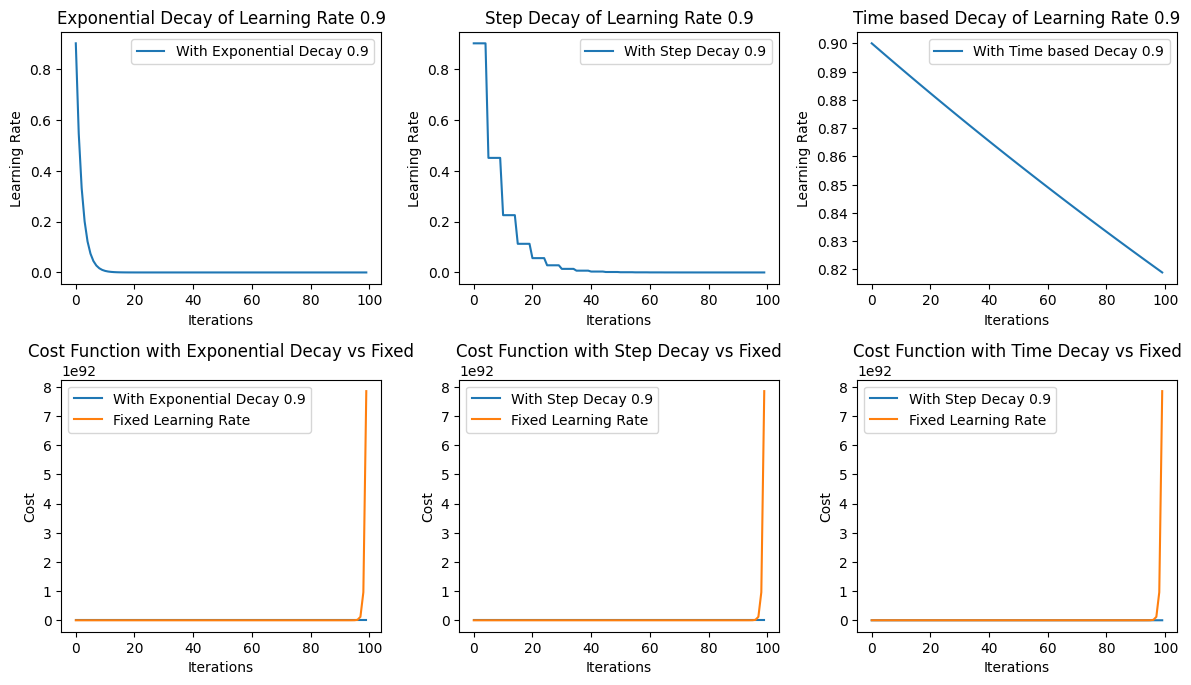

In [19]:
# Parameters
n_iterations = 100
initial_lr=0.9
lr_history_exp, cost_history_exp, theta_exp = train_model(exponential_decay, initial_lr,  n_iterations)
lr_history_step, cost_history_step, theta_step = train_model(step_decay, initial_lr,  n_iterations)
lr_history_time, cost_history_time, theta_step = train_model(time_based_decay, initial_lr,  n_iterations)
lr_history_fixed, cost_history_fixed, theta_step = train_model(None, initial_lr,  n_iterations)
plot_learning_curves(initial_lr)


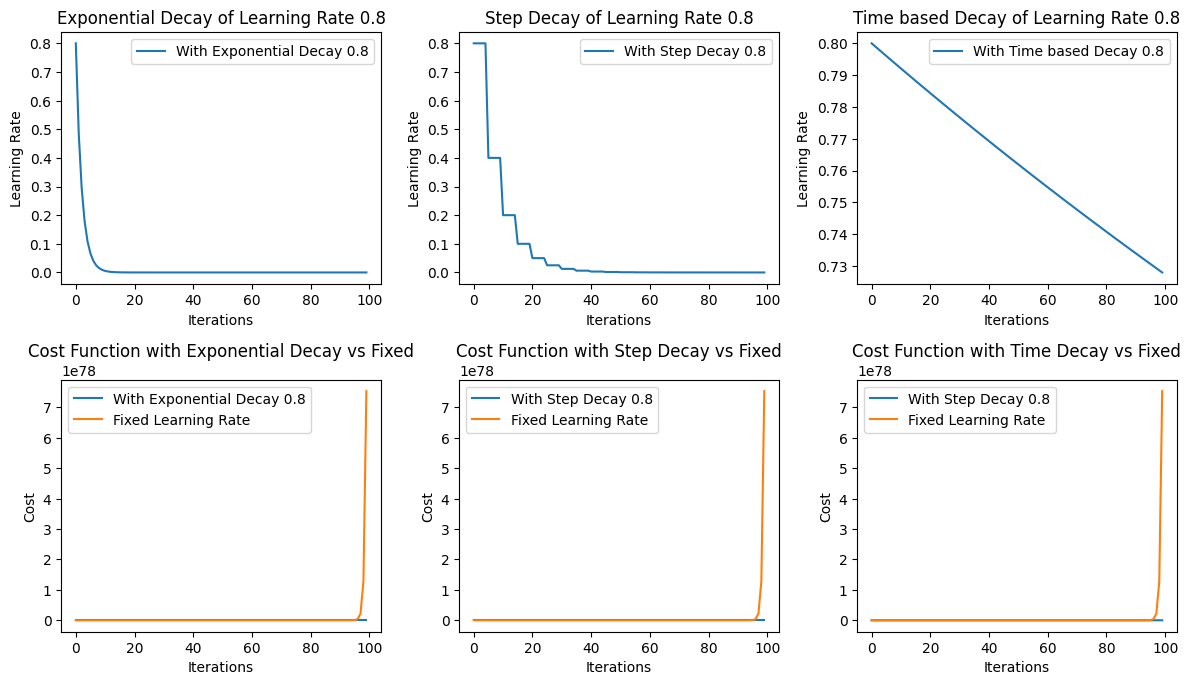

In [20]:
# Parameters
n_iterations = 100
initial_lr=0.8
lr_history_exp, cost_history_exp, theta_exp = train_model(exponential_decay, initial_lr,  n_iterations)
lr_history_step, cost_history_step, theta_step = train_model(step_decay, initial_lr,  n_iterations)
lr_history_time, cost_history_time, theta_step = train_model(time_based_decay, initial_lr,  n_iterations)
lr_history_fixed, cost_history_fixed, theta_step = train_model(None, initial_lr,  n_iterations)
plot_learning_curves(initial_lr)

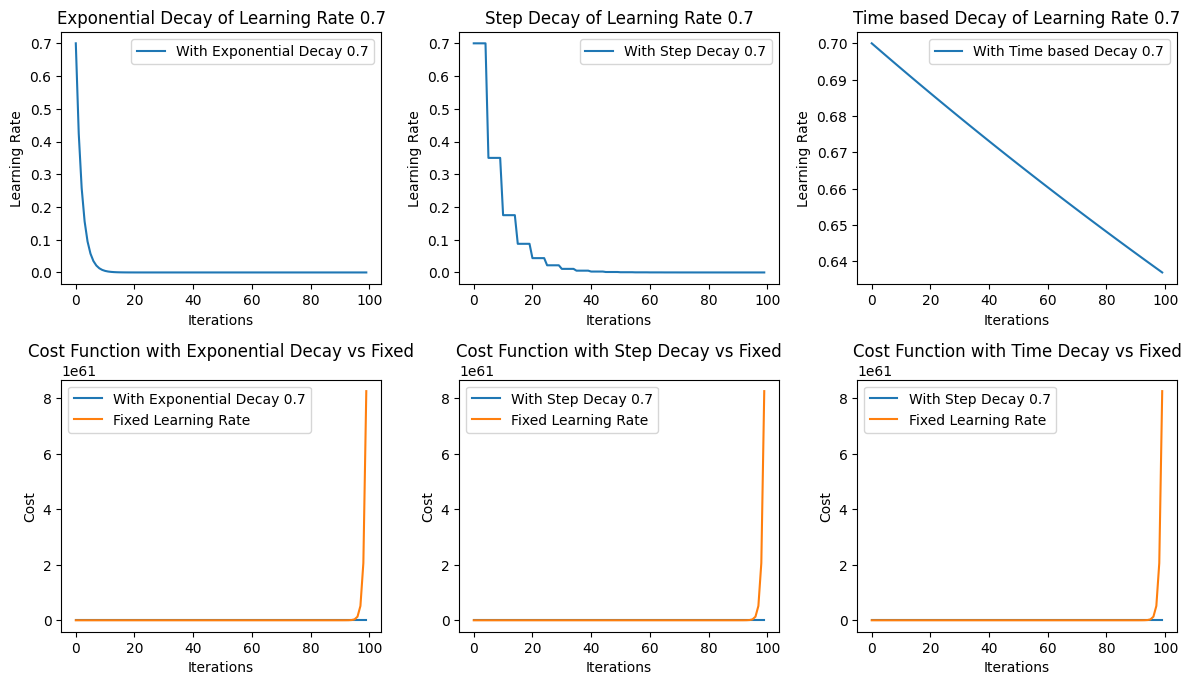

In [21]:
# Parameters
n_iterations = 100
initial_lr=0.7
lr_history_exp, cost_history_exp, theta_exp = train_model(exponential_decay, initial_lr,  n_iterations)
lr_history_step, cost_history_step, theta_step = train_model(step_decay, initial_lr,  n_iterations)
lr_history_time, cost_history_time, theta_step = train_model(time_based_decay, initial_lr,  n_iterations)
lr_history_fixed, cost_history_fixed, theta_step = train_model(None, initial_lr,  n_iterations)
plot_learning_curves(initial_lr)

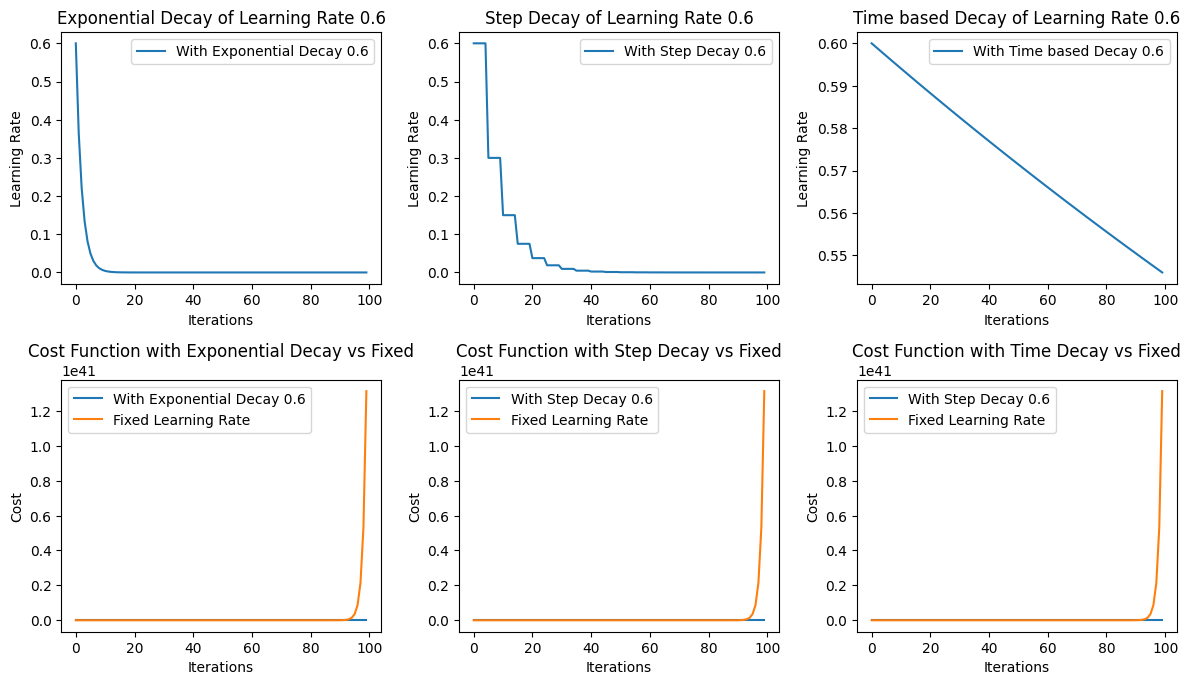

In [22]:
# Parameters
n_iterations = 100
initial_lr=0.6
lr_history_exp, cost_history_exp, theta_exp = train_model(exponential_decay, initial_lr,  n_iterations)
lr_history_step, cost_history_step, theta_step = train_model(step_decay, initial_lr,  n_iterations)
lr_history_time, cost_history_time, theta_step = train_model(time_based_decay, initial_lr,  n_iterations)
lr_history_fixed, cost_history_fixed, theta_step = train_model(None, initial_lr,  n_iterations)
plot_learning_curves(initial_lr)

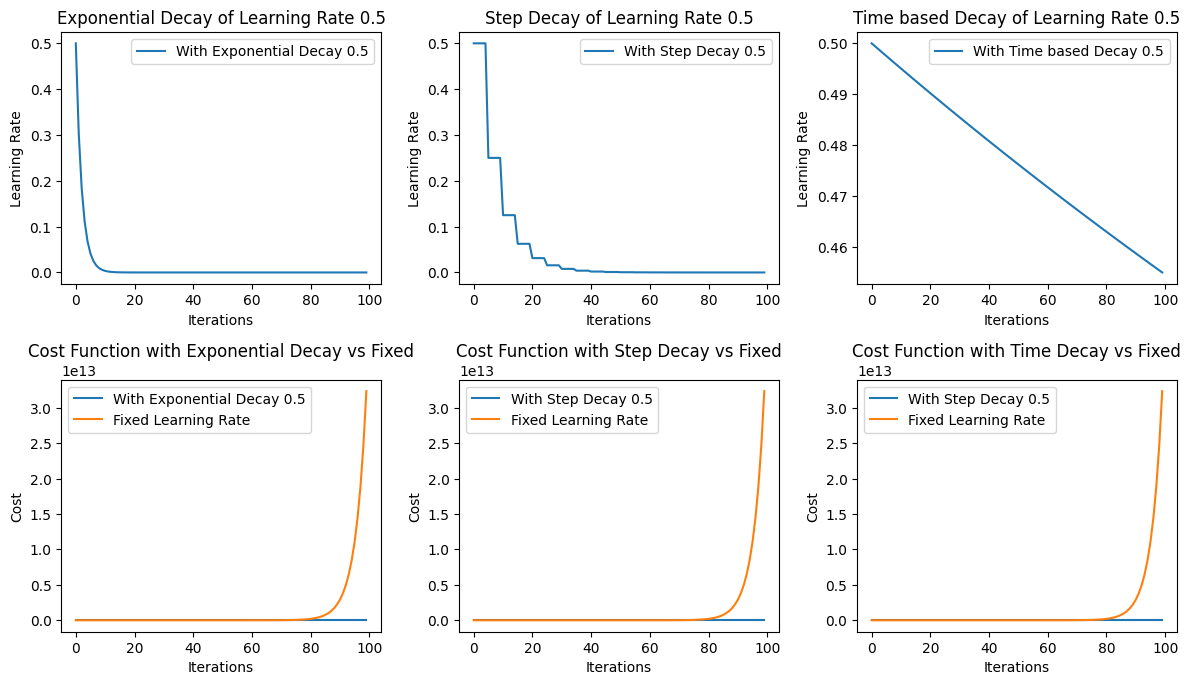

In [23]:
# Parameters
n_iterations = 100
initial_lr=0.5
lr_history_exp, cost_history_exp, theta_exp = train_model(exponential_decay, initial_lr,  n_iterations)
lr_history_step, cost_history_step, theta_step = train_model(step_decay, initial_lr,  n_iterations)
lr_history_time, cost_history_time, theta_step = train_model(time_based_decay, initial_lr,  n_iterations)
lr_history_fixed, cost_history_fixed, theta_step = train_model(None, initial_lr,  n_iterations)
plot_learning_curves(initial_lr)

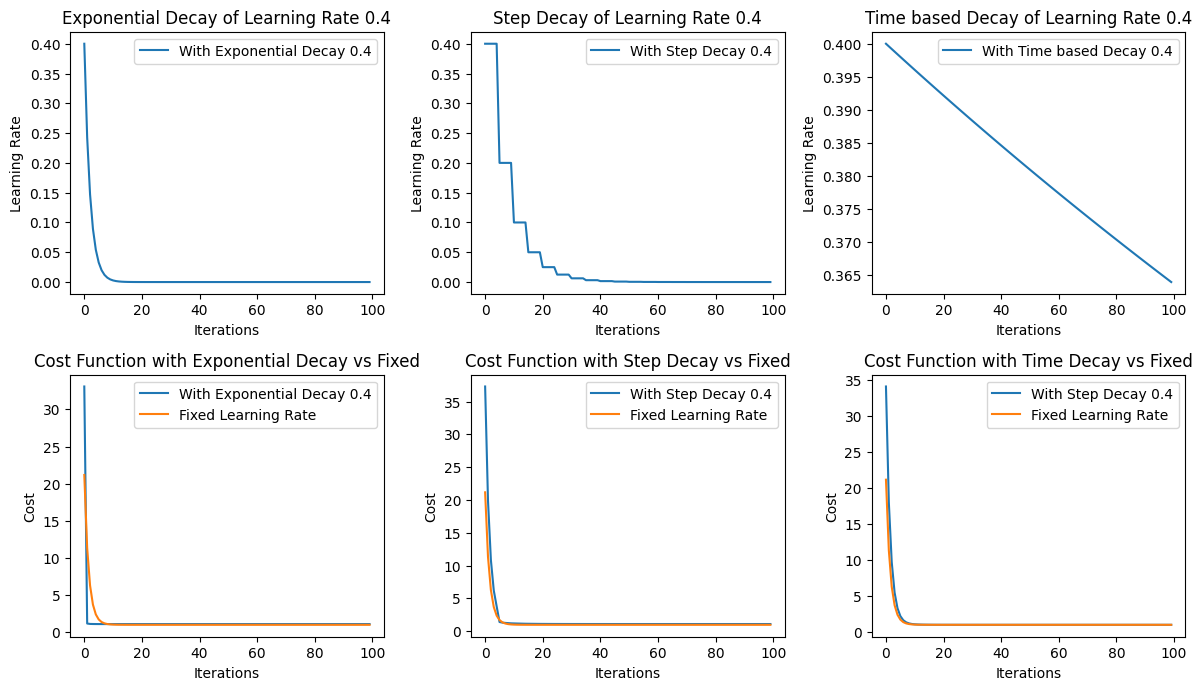

In [24]:
# Parameters
n_iterations = 100
initial_lr=0.4
lr_history_exp, cost_history_exp, theta_exp = train_model(exponential_decay, initial_lr,  n_iterations)
lr_history_step, cost_history_step, theta_step = train_model(step_decay, initial_lr,  n_iterations)
lr_history_time, cost_history_time, theta_step = train_model(time_based_decay, initial_lr,  n_iterations)
lr_history_fixed, cost_history_fixed, theta_step = train_model(None, initial_lr,  n_iterations)
plot_learning_curves(initial_lr)

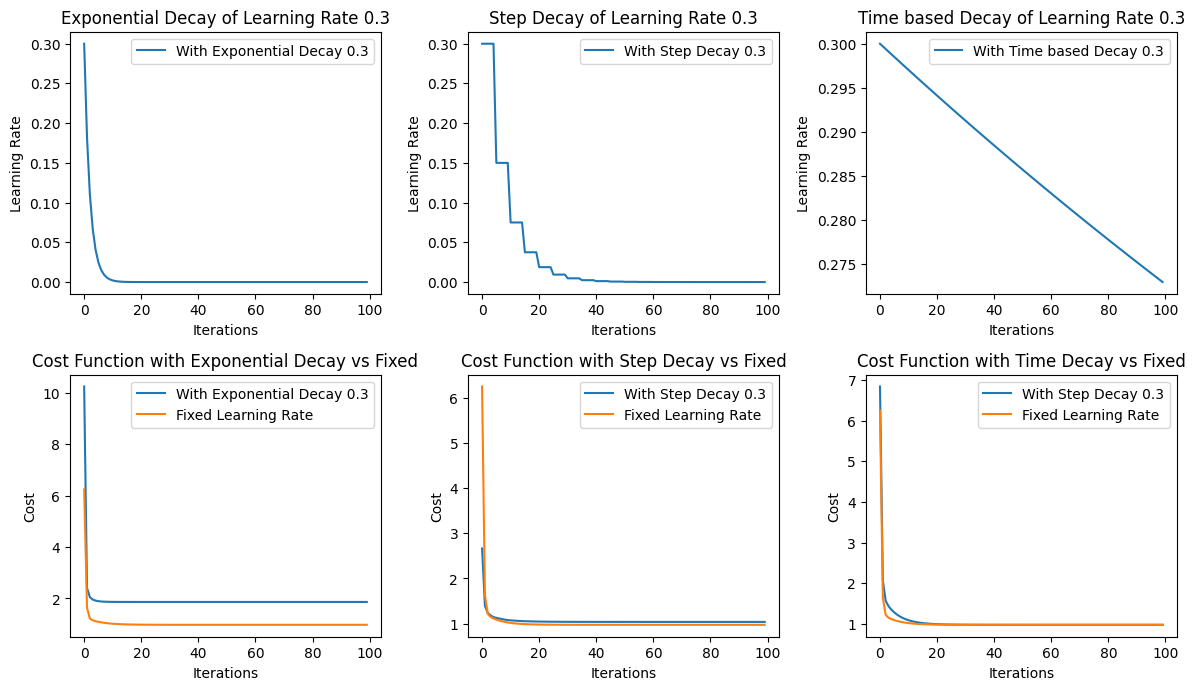

In [25]:
# Parameters
n_iterations = 100
initial_lr=0.3
lr_history_exp, cost_history_exp, theta_exp = train_model(exponential_decay, initial_lr,  n_iterations)
lr_history_step, cost_history_step, theta_step = train_model(step_decay, initial_lr,  n_iterations)
lr_history_time, cost_history_time, theta_step = train_model(time_based_decay, initial_lr,  n_iterations)
lr_history_fixed, cost_history_fixed, theta_step = train_model(None, initial_lr,  n_iterations)
plot_learning_curves(initial_lr)

As we see , initial learning rate matters a lot incase of
Fixed learning rate. But in other learning rate schedule, it decreases the learning rate as iterations progress.


1. Convergence Speed

    Constant Learning Rate: A constant learning rate can be effective but may require careful tuning. If too high, it might cause the model to overshoot the optimal solution, while too low a rate can lead to slow convergence.

    Step Decay: This method reduces the learning rate at predefined intervals (e.g., every 10 epochs). It allows for a fast initial convergence (large learning rate) and more refined adjustments as training progresses (smaller learning rate). This often helps in reaching a better solution by fine-tuning the weights.

    Time-Based Decay: This approach decreases the learning rate over time based on a decay function. It allows for a smooth reduction in learning rate, which can lead to better convergence by gradually fine-tuning weights. It helps avoid overshooting and stabilizes the learning process.

    Exponential Decay: Similar to time-based decay, this reduces the learning rate exponentially. It can be very effective for models that need a large initial learning rate to start with and then require a significant decrease to fine-tune. It helps the model settle into a minimum more reliably as training progresses.

2. Training Stability

    Constant Learning Rate: May lead to instability if not properly tuned. If too high, it can cause divergence or oscillations in the cost function.

    Step Decay: Generally stabilizes training as the learning rate is reduced progressively. It allows the model to converge quickly at first and then fine-tune the weights.

    Time-Based Decay: Tends to provide a stable training process by continuously reducing the learning rate. This prevents large updates that could destabilize the training process.

    Exponential Decay: Provides a smooth and gradual reduction in the learning rate, which can help in maintaining stability and avoiding abrupt changes in the learning process.

3. Model Accuracy and Generalization

    Constant Learning Rate: Might not always lead to the best generalization as it can get stuck in local minima or saddle points if not adjusted over time.

    Step Decay: Often leads to better generalization as it combines fast convergence with gradual refinement. The reduction in learning rate allows the model to explore the parameter space more thoroughly.

    Time-Based Decay: Helps achieve good generalization by gradually reducing the learning rate, leading to more fine-tuned weights and potentially better performance on unseen data.

    Exponential Decay: Can improve generalization by starting with a high learning rate to escape local minima and then decreasing it to refine the solution. The smooth reduction helps in reaching a more optimal and generalized solution.

4. Example Observations

    Constant Learning Rate: Training might plateau early if the learning rate is not optimal.
    Step Decay: Often results in training that initially converges quickly and then fine-tunes with reduced learning rates.
    Time-Based Decay: Results in a smooth training process with a gradual decrease in learning rate.
    Exponential Decay: Usually provides a good balance between fast convergence and refined final tuning.

Summary

Choosing the right learning rate schedule can make a significant difference in the training efficiency, stability, and performance of the model. It’s often beneficial to experiment with different schedules and tune hyperparameters to find the best configuration for the specific problem.